# Logistic Regressions

Continuation of lesson on logistic regressions.

Data: Kaggle titanic dataset from
https://www.kaggle.com/c/titanic

In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data = pd.read_csv('titanic_train.csv')

In [3]:
test_data = pd.read_csv('titanic_test.csv')

In [4]:
test_survival_data = pd.read_csv('survival_test.csv')

## Data Preparation

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
#review the structure of the data

train_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


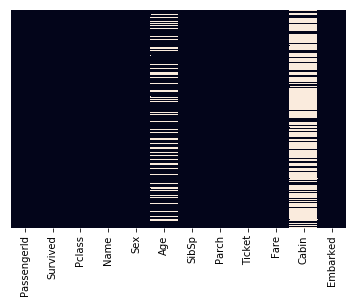

In [8]:
#last time we worked to replace null values - here are some supporting visualizations

sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False)

In [34]:
training = train_data.drop(['Pclass','PassengerId','Sex','Embarked','Name','Ticket','Cabin'],axis=1,inplace=False)

In [35]:
age_unknown = train_data.Age.isnull()*1

In [36]:
training = pd.concat([age_unknown,training],axis=1)

In [37]:
training.head(2)

,Age,Survived,Age,SibSp,Parch,Fare
0,0,0,22.0,1,0,7.2500
1,0,1,38.0,1,0,71.2833


In [38]:
training.columns.values[0] = "age_unknown"
training.head(2)

,age_unknown,Survived,Age,SibSp,Parch,Fare
0,0,0,22.0,1,0,7.2500
1,0,1,38.0,1,0,71.2833


In [39]:
def modify_Age(u):
    if u > 0:
        return u
    else:
        return -1
    
#put in the mean
#favorite: do a regression for age against all of the other variables
#does SKLearn have this built in?

In [40]:
training.Age = training.Age.apply(lambda x: modify_Age(x))

In [41]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
age_unknown    891 non-null int64
Survived       891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int64(4)
memory usage: 41.8 KB


In [42]:
# No null values here. Let's create an indicator for whether Cabin was known or unknown in training_data

In [43]:
cabin_known = train_data.Cabin.notnull()*1
cabin_known.head()

0    0
1    1
2    0
3    1
4    0
Name: Cabin, dtype: int64

In [44]:
# Now let's convert Pclass, Sex, Cabin, Embarked to indicator variables 

In [45]:
male = pd.get_dummies(train_data.Sex,drop_first=True)
male.head()

,male
0,1
1,0
2,0
3,0
4,1


In [46]:
embark = pd.get_dummies(train_data.Embarked,drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [47]:
fare_class = pd.get_dummies(train_data.Pclass,drop_first=True)
fare_class.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [48]:
#Add indicator variables to the training data frame

In [49]:
training = pd.concat([training,male,embark,cabin_known,fare_class],axis=1)

In [50]:
training.head()

,age_unknown,Survived,Age,SibSp,Parch,Fare,male,Q,S,Cabin,2,3
0,0,0,22.0,1,0,7.2500,1,0,1,0,0,1
1,0,1,38.0,1,0,71.2833,0,0,0,1,0,0
2,0,1,26.0,0,0,7.9250,0,0,1,0,0,1
3,0,1,35.0,1,0,53.1000,0,0,1,1,0,0
4,0,0,35.0,0,0,8.0500,1,0,1,0,0,1


## Fit the Models

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
X_train = training.drop('Survived',axis=1)
y_train = training.Survived

In [72]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [73]:
ridgemodel = LogisticRegression(penalty = 'l2', C=.5)
ridgemodel.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [74]:
lassomodel = LogisticRegression(penalty = 'l1', C=.5)
lassomodel.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Preparing Test Data

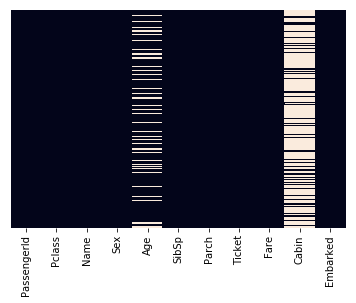

In [75]:
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False)

In [76]:
testing = test_data.drop(['Pclass','PassengerId','Sex','Embarked','Name','Ticket','Cabin'],axis=1,inplace=False)

In [77]:
age_unknown2 = test_data.Age.isnull()*1
testing = pd.concat([age_unknown2,testing],axis=1)
testing.columns.values[0] = "age_unknown"

In [78]:
testing.head(2)

,age_unknown,Age,SibSp,Parch,Fare
0,0,34.5,0,0,7.8292
1,0,47.0,1,0,7.0000


In [79]:
male2 = pd.get_dummies(test_data.Sex,drop_first=True)
embark2 = pd.get_dummies(test_data.Embarked,drop_first=True)
fare_class2 = pd.get_dummies(test_data.Pclass,drop_first=True)
cabin_known2 = test_data.Cabin.notnull()*1
#combine datasets, split after (maybe flag original training/test split)

In [80]:
testing = pd.concat([testing,male2,embark2,cabin_known2,fare_class2],axis=1)

In [82]:
testing.Age = testing.Age.apply(lambda x: modify_Age(x))

In [87]:
testing.tail()

,age_unknown,Age,SibSp,Parch,Fare,male,Q,S,Cabin,2,3
413,1,-1.0,0,0,8.0500,1,0,1,0,0,1
414,0,39.0,0,0,108.9000,0,0,0,1,0,0
415,0,38.5,0,0,7.2500,1,0,1,0,0,1
416,1,-1.0,0,0,8.0500,1,0,1,0,0,1
417,1,-1.0,1,1,22.3583,1,0,0,0,0,1


In [88]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
age_unknown    418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
male           418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
Cabin          418 non-null int64
2              418 non-null uint8
3              418 non-null uint8
dtypes: float64(2), int64(4), uint8(5)
memory usage: 21.7 KB


In [90]:
testing = pd.concat([test_survival_data.Survived,testing],axis=1)

In [91]:
testing.dropna(inplace=True)

In [92]:
testing.tail()

,Survived,age_unknown,Age,SibSp,Parch,Fare,male,Q,S,Cabin,2,3
413,0,1,-1.0,0,0,8.0500,1,0,1,0,0,1
414,1,0,39.0,0,0,108.9000,0,0,0,1,0,0
415,0,0,38.5,0,0,7.2500,1,0,1,0,0,1
416,0,1,-1.0,0,0,8.0500,1,0,1,0,0,1
417,0,1,-1.0,1,1,22.3583,1,0,0,0,0,1


## Fitting the Model

In [99]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [101]:
X_test = testing.drop(['Survived'],axis=1,inplace=False)
y_test = testing.Survived

In [102]:
y_test.sum()/y_test.count()

0.3645083932853717

In [97]:
y_logmodel = logmodel.predict(X_test)
y_ridgemodel = ridgemodel.predict(X_test)
y_lassomodel = lassomodel.predict(X_test)

In [103]:
confusion_matrix(y_test,y_logmodel)

array([[250,  15],
       [ 12, 140]])

In [108]:
confusion_matrix(y_test,y_ridgemodel)

array([[250,  15],
       [ 13, 139]])

In [109]:
confusion_matrix(y_test,y_lassomodel)

array([[252,  13],
       [ 12, 140]])

In [113]:
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(logmodel.coef_))], axis = 1)

In [114]:
coefficients

,0,0
0,age_unknown,-1.009388
1,Age,-0.029909
2,SibSp,-0.283147
3,Parch,-0.109801
4,Fare,0.003624
5,male,-2.503850
6,Q,0.043897
7,S,-0.406031
8,Cabin,1.105334
9,2,0.130515


In [115]:
coefficients = pd.concat([coefficients,pd.DataFrame(np.transpose(ridgemodel.coef_))], axis = 1)

In [116]:
coefficients = pd.concat([coefficients,pd.DataFrame(np.transpose(lassomodel.coef_))], axis = 1)

In [118]:
coefficients.columns = ['variable','logistic','ridge','lasso']

In [119]:
coefficients

,variable,logistic,ridge,lasso
0,age_unknown,-1.009388,-0.806419,-0.902325
1,Age,-0.029909,-0.025071,-0.028413
2,SibSp,-0.283147,-0.264438,-0.275154
3,Parch,-0.109801,-0.095020,-0.089586
4,Fare,0.003624,0.004659,0.003489
5,male,-2.503850,-2.372470,-2.521037
6,Q,0.043897,0.068644,0.000000
7,S,-0.406031,-0.341194,-0.344785
8,Cabin,1.105334,1.118734,0.988363
9,2,0.130515,0.276911,0.000000


In [120]:
print(classification_report(y_test,y_logmodel))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       265
           1       0.90      0.92      0.91       152

   micro avg       0.94      0.94      0.94       417
   macro avg       0.93      0.93      0.93       417
weighted avg       0.94      0.94      0.94       417



In [121]:
print(classification_report(y_test,y_ridgemodel))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       265
           1       0.90      0.91      0.91       152

   micro avg       0.93      0.93      0.93       417
   macro avg       0.93      0.93      0.93       417
weighted avg       0.93      0.93      0.93       417



In [122]:
print(classification_report(y_test,y_lassomodel))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       265
           1       0.92      0.92      0.92       152

   micro avg       0.94      0.94      0.94       417
   macro avg       0.93      0.94      0.94       417
weighted avg       0.94      0.94      0.94       417

